# 最小二乘法求
$y=4x+2+R$  ,-1<R<1

In [1]:
import numpy as np

In [2]:
np.random.seed(0)
X = np.random.normal(size=(100,1),scale=1)
#X = X + RA
X.shape

(100, 1)

In [3]:
X[:,0].shape

(100,)

In [4]:
Y = 4 * X[:,0]+ 2 
RA = np.random.random(100)*2-1
Y=RA+Y
RA,Y

(array([-0.1522899 ,  0.21278643, -0.9616136 , -0.39685037,  0.32034707,
        -0.41984479,  0.23603086, -0.1424626 , -0.72905187, -0.40343535,
         0.13992982,  0.18174552,  0.1486505 ,  0.30640164,  0.30420654,
        -0.13716313,  0.79309319, -0.26487626, -0.12827015,  0.78384671,
         0.61238798,  0.40777717, -0.79954623,  0.83896523,  0.4284826 ,
         0.99769401, -0.70110339,  0.73625211, -0.67501413,  0.23111913,
        -0.75236003,  0.69601646,  0.61463792,  0.13820148, -0.18563341,
        -0.86166601,  0.39485755, -0.09291463,  0.4441112 ,  0.73276465,
         0.95104301,  0.71160668, -0.97657183, -0.28004387,  0.45998112,
        -0.65674065,  0.04207321, -0.89132402, -0.60000695, -0.96295641,
         0.58739541, -0.55215062, -0.30929664,  0.85616259,  0.4088288 ,
        -0.93632214, -0.67061169,  0.2429568 ,  0.15445718, -0.52421436,
         0.868428  ,  0.22793191,  0.07126561,  0.17981995,  0.46024406,
        -0.37611001, -0.20355788, -0.5803125 , -0.6

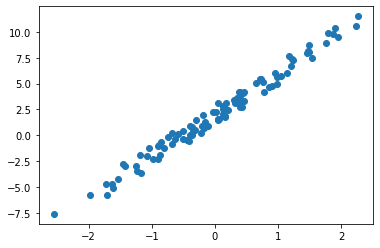

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

In [6]:
#数据拼接
All_data = np.concatenate((X,Y.reshape(100,1)),axis=1)
All_data.shape

(100, 2)

In [7]:
#拆分训练集和测试集
np.random.shuffle(All_data)#打乱数据
train_data = All_data[:70,:]
test_data = All_data[70:,:]

In [8]:
train_data.shape,test_data.shape

((70, 2), (30, 2))

## 1.1构造模型
$y = w \times X + b$

In [9]:
#随机初始化参数
w = np.random.normal(size=(1)) #结果是数组
b = np.random.rand() #结果是一个数
w,b

(array([-0.78508653]), 0.12065699118611972)

## 1.2定义损失函数
$Loss = 0.5*\sum{(y-Wx)^2}$

In [10]:
#超参数
lr = 0.0001 #学习率

In [11]:
#构造增广向量
W_hat = np.concatenate((w,np.array([b])))
W_hat

array([-0.78508653,  0.12065699])

In [12]:
W_hat = W_hat.reshape(2,1)
W_hat,W_hat.shape

(array([[-0.78508653],
        [ 0.12065699]]),
 (2, 1))

In [13]:
X = train_data[:,:-1]
X = X.reshape(1,70)
Y = train_data[:,-1]
Y = Y.reshape(70,1)
X.shape,Y.shape

((1, 70), (70, 1))

In [14]:
#特征向量
X_hat = np.concatenate((X,np.ones((1,70))),axis=0)
X_hat.shape

(2, 70)

In [15]:
Num = 0
w_list = []
b_list = []
loss_list = []
while True:
    Num = Num + 1
    #迭代W
    W_hat = W_hat + lr * np.dot( X_hat , ( Y - np.dot(X_hat.T,W_hat) ) )
    #计算loss值
    loss = np.sum((Y - np.dot(X_hat.T,W_hat))**2)/2
    w_list.append(W_hat[0])
    b_list.append(W_hat[1])
    loss_list.append(loss)
    #print(loss)
    if loss < 1e-3 or Num > 600 :
        break

In [16]:
loss_list[-1],w_list[-1],b_list[-1]

(10.801624301243987, array([3.93360719]), array([2.0017061]))

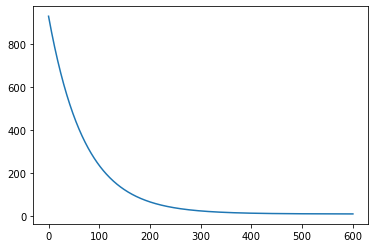

In [17]:
plt.plot(range(len(w_list)),loss_list)

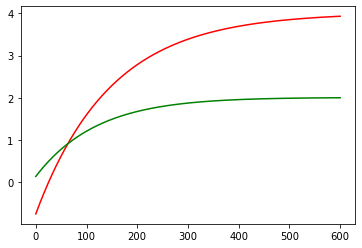

In [18]:
plt.plot(w_list,c='r')
plt.plot(b_list,c='g')

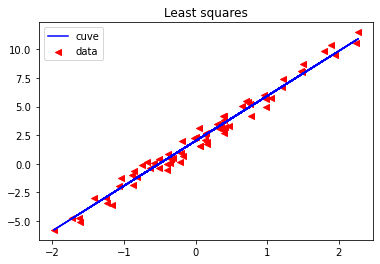

In [19]:
plt.title("Least squares")
c = train_data[:,:-1]*w_list[-1]+b_list[-1]

plt.scatter(train_data[:,:-1],train_data[:,-1],color='red',marker='<',label='data')#ls或linestyle
plt.plot(train_data[:,:-1],c,color='blue',label='cuve')
plt.legend()

plt.show()